In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [ ]:
mat = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/dataset/Maternal Health Risk Data Set.csv'))
mat.head()
mat.info()
mat.shape
mat.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
mat_test = mat.copy()
mat_test.info()
mat_test.head()
mat_test.shape
mat_test.describe()
print("Percentage of Null Values of mat Features:")
round(100*(mat_test.isnull().sum()/len(mat_test)), 2).sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
Percentage of Null Values of mat Features:


Age            0.0
SystolicBP     0.0
DiastolicBP    0.0
BS             0.0
BodyTemp       0.0
HeartRate      0.0
RiskLevel      0.0
dtype: float64

In [ ]:
duplicate_count = mat_test.duplicated().sum()
if duplicate_count > 0:
    print(f"{duplicate_count} duplicate rows found in the dataset. Handling duplicates...")
    mat_test.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")

562 duplicate rows found in the dataset. Handling duplicates...
Duplicate rows have been removed.


In [ ]:
X = mat[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = mat['RiskLevel']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_selected = mat[['BodyTemp', 'HeartRate']]

X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [ ]:
model_algo = {
    "Logistic Regression": LogisticRegression(max_iter=30000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

In [ ]:
result1 = {}
for name, model in model_algo.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result1[name] = accuracy

result2 = {}
for name, model in model_algo.items():
    model.fit(X_selected_train, y_train)
    y_pred = model.predict(X_selected_test)
    accuracy = accuracy_score(y_test, y_pred)
    result2[name] = accuracy

visual_output = pd.DataFrame({
    "Model": list(result1.keys()) + list(result2.keys()),
    "Accuracy": list(result1.values()) + list(result2.values()),
    "Feature Selection": ['All Features'] * len(model_algo) + ['Selected Features'] * len(model_algo)
})

In [49]:
result1 = {}
for name, model in model_algo.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result1[name] = accuracy

print("Accuracy Score with All Features:")
for name, accuracy in result1.items():
    print(f"{name}: {accuracy*100:.2f}%")

result2 = {}
for name, model in model_algo.items():
    model.fit(X_selected_train, y_train)
    y_pred = model.predict(X_selected_test)
    accuracy = accuracy_score(y_test, y_pred)
    result2[name] = accuracy

print("\nAccuracy Score with Selected Features:")
for name, accuracy in result2.items():
    print(f"{name}: {accuracy*100:.2f}%")

Accuracy Score with All Features:
Logistic Regression: 63.61%
Decision Tree: 80.00%
Random Forest: 79.67%
Support Vector Machine: 55.74%

Accuracy Score with Selected Features:
Logistic Regression: 45.25%
Decision Tree: 49.84%
Random Forest: 48.52%
Support Vector Machine: 43.93%


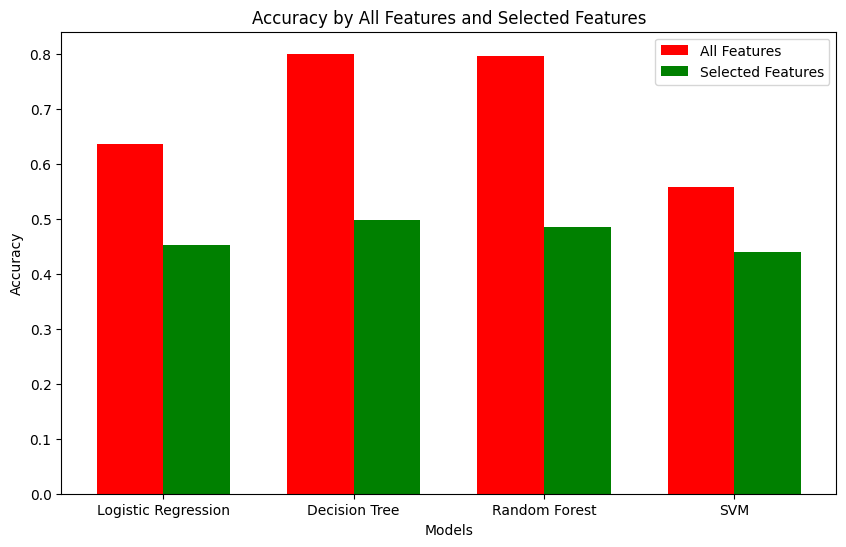

In [70]:
model_algo_data = {
    'Logistic Regression': {'All Features': [list(result1.values())[0]], 'Selected Features': [list(result2.values())[0]]},
    'Decision Tree': {'All Features': [list(result1.values())[1]], 'Selected Features': [list(result2.values())[1]]},
    'Random Forest': {'All Features' :[list(result1.values())[2]], 'Selected Features': [list(result2.values())[2]]},
    'SVM': {'All Features': [list(result1.values())[3]], 'Selected Features': [list(result2.values())[3]]},
}

models_data = list(model_algo_data.keys())
all_features_accuracy = [model_algo_data[model]['All Features'][0] for model in models_data]
selected_features_accuracy = [model_algo_data[model]['Selected Features'][0] for model in models_data]

x = np.arange(len(models_data))

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35

rectangle_1 = ax.bar(x - width/2, all_features_accuracy, width, label='All Features', color='red')
rectangle_2 = ax.bar(x + width/2, selected_features_accuracy, width, label='Selected Features', color='green')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by All Features and Selected Features')
ax.set_xticks(x)
ax.set_xticklabels(models_data)
ax.legend()

plt.show()

In [79]:
best_model = max(result2, key=result2.get)
top_model = model_algo[best_model]

top_model.fit(X_train, y_train)
predictions_highest = top_model.predict(X_test)
accuracy_highest = accuracy_score(y_test, predictions_highest)

stacking_ens = StackingClassifier(estimators=[('highest_model', top_model)], final_estimator=LogisticRegression(max_iter=10000))
stacking_ens.fit(X_train, y_train)
stacking_score = stacking_ens.score(X_test, y_test)

adaboost_ens = AdaBoostClassifier(estimator=top_model, n_estimators=100)
adaboost_ens.fit(X_train, y_train)
adaboost_score = adaboost_ens.score(X_test, y_test)

bagging_ens = BaggingClassifier(estimator=top_model, n_estimators=100)
bagging_ens.fit(X_train, y_train)
bagging_score = bagging_ens.score(X_test, y_test)

ensemble_performance = {
    "Individual": accuracy_highest,
    "Stacking": stacking_score,
    "AdaBoost": adaboost_score,
    "Bagging": bagging_score
}
print("Summary of Ensemble Accuracies with All Features:")
for model, accuracy in ensemble_performance.items():
    print(f"{model}: {accuracy:.4f}")

Summary of Ensemble Accuracies with All Features:
Individual: 0.8000
Stacking: 0.8000
AdaBoost: 0.8000
Bagging: 0.8000


In [91]:
model_best = max(result2, key=result2.get)
model_top = model_algo[model_best]

model_top.fit(X_selected_train, y_train)
predictions_highest = model_top.predict(X_selected_test)
accuracy_highest = accuracy_score(y_test, predictions_highest)

stacking_ens = StackingClassifier(estimators=[('highest_model', model_top)], final_estimator=LogisticRegression(max_iter=10000))
stacking_ens.fit(X_selected_train, y_train)
stacking_score = stacking_ens.score(X_selected_test, y_test)

adaboost_ens = AdaBoostClassifier(estimator=model_top, n_estimators=100)
adaboost_ens.fit(X_selected_train, y_train)
adaboost_score = adaboost_ens.score(X_selected_test, y_test)

bagging_ens = BaggingClassifier(estimator=model_top, n_estimators=100)
bagging_ens.fit(X_selected_train, y_train)
bagging_score = bagging_ens.score(X_selected_test, y_test)

ensemble_performance2 = {
    "Individual": accuracy_highest,
    "Stacking": stacking_score,
    "AdaBoost": adaboost_score,
    "Bagging": bagging_score
}

print("Summary of Ensemble Accuracies with Selected Features:")
for model, accuracy in ensemble_performance2.items():
    print(f"{model}: {accuracy:.4f}")

Summary of Ensemble Accuracies with Selected Features:
Individual: 0.4984
Stacking: 0.4951
AdaBoost: 0.4689
Bagging: 0.4590


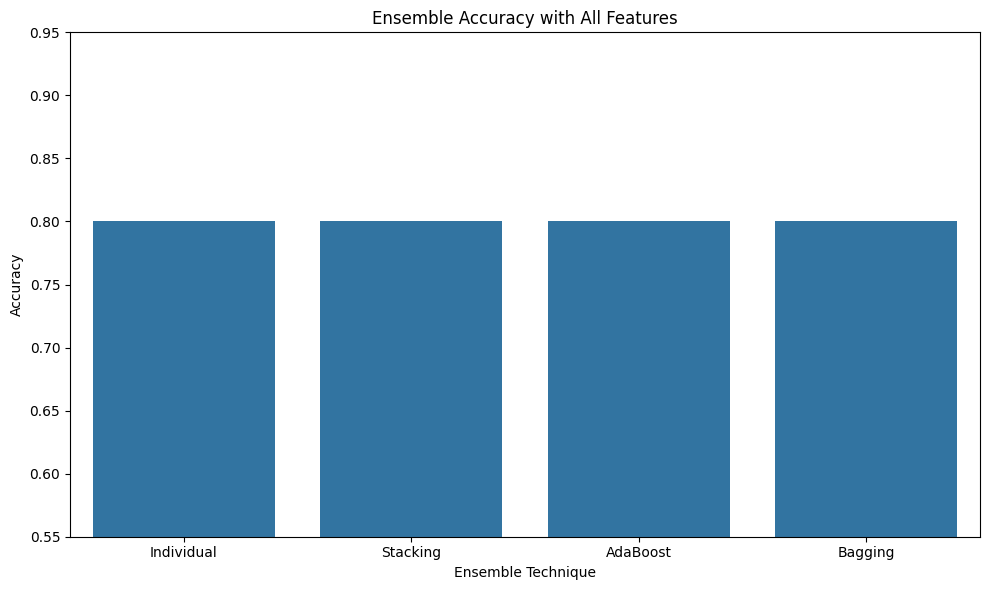

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(ensemble_performance.keys()), y=list(ensemble_performance.values()))
plt.xlabel('Ensemble Technique')
plt.ylabel('Accuracy')
plt.title('Ensemble Accuracy with All Features')
plt.ylim(0.55, 0.95)
plt.tight_layout()
plt.show()

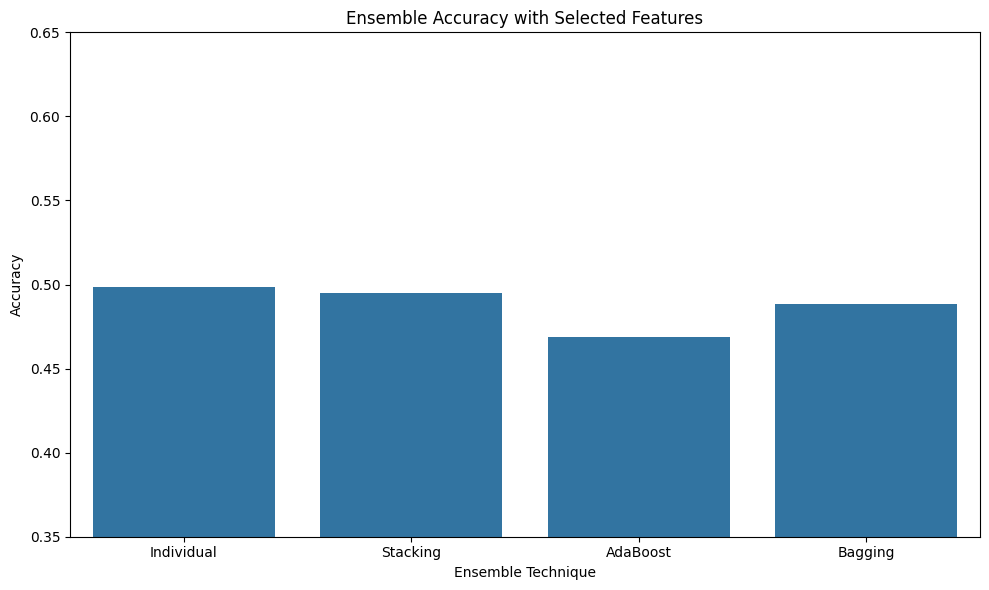

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(ensemble_performance2.keys()), y=list(ensemble_performance2.values()))
plt.xlabel('Ensemble Technique')
plt.ylabel('Accuracy')
plt.title('Ensemble Accuracy with Selected Features')
plt.ylim(0.35, 0.65)
plt.tight_layout()
plt.show()
